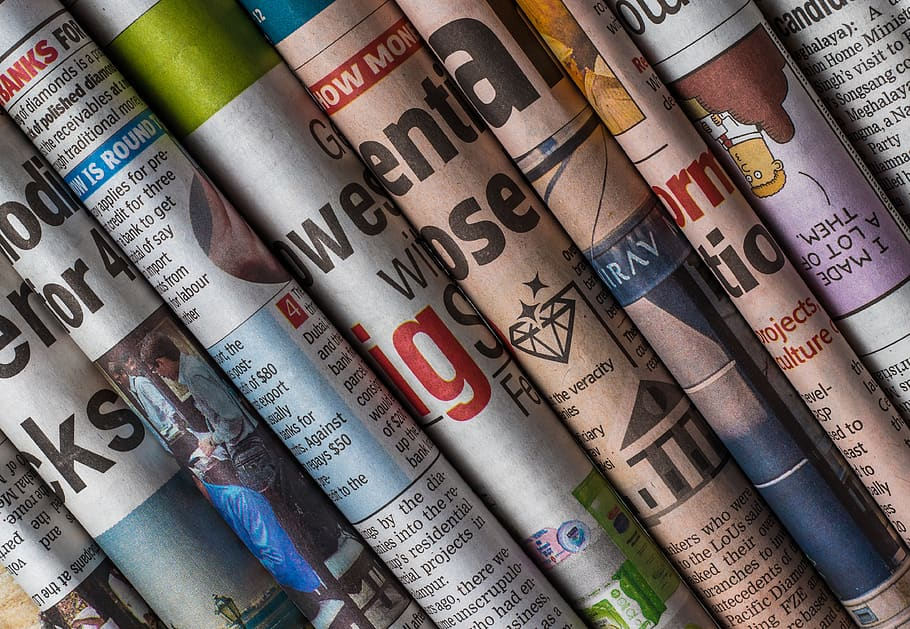

Table of contents:
* [1. Project Overview](#chapter1)
    * [1.1 Meet the team](#section_1_1)
    * [1.2 Introduction](#section_1_2)
* [2. Importing Packages](#chapter2)
* [3. Loading Data](#chapter3)
* [4. Data Cleaning](#chapter4)
* [5. Exploratory Data Analysis (EDA)](#chapter5)
* [6. Train-test splits](#chapter6)
    * [6.1 Model 1](#section_6_1)
    * [6.1 Model 2](#section_6_2)
    * [6.1 Model 3](#section_6_3)
* [7. Model evaluation metrics](#chapter7)
* [8. Model performance analysis](#chapter8)
* [9. Conclusion](#chapter9)
* [10. References](#chapter10)

## 1. Project Overview <a class="anchor" id="chapter1"></a>

### 1.1 Meet the team: <a class="anchor" id="section_1_1"></a>

> - Obed Segwate Mabowa 
    - <mabowaobed98@gmail.com>,

### 1.1 Introduction: <a class="anchor" id="section_1_1"></a>

<b> Objective of the Project:</b>

<b> Data Source:</b>

<b> Importance of the Study:</b>

<b> Key Questions or Hypotheses:</b>

<b> Methodology Overview:</b>

<b> Structure of the Notebook:</b>

## 2. Importing Packages <a class="anchor" id="chapter2"></a>
+ For data manipulation and analysis, `Pandas` and `Numpy`.
+ For data visualization, `Matplotlib` and `Seaborn`

In [33]:
# Libraries for data loading, manipulation and analysis
from wordcloud import WordCloud
import numpy as np
import pandas as pd
import csv
import seaborn as sns
import matplotlib.pyplot as plt
import string
import re
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, PorterStemmer


# Displays output inline
%matplotlib inline

# Libraries for Handing Errors
import warnings
warnings.filterwarnings('ignore')

## 3. Loading Data <a class="anchor" id="chapter3"></a>

The data used for this project was located in the `co2_emissions_from_agri.csv` file. To better manipulate and analyse the `co2_emissions_from_agri.csv` file, it was loaded into a Pandas Data Frame using the Pandas function, `.read_csv()` and referred to as `df`. For demonstrating the column index in the dataframe , `index_col=False` was implemented.

In [22]:
# Load the data
test_df = pd.read_csv("test.csv", index_col=False)
train_df = pd.read_csv("train.csv", index_col=False)

print(train_df.head())
print(test_df.head())


                                           headlines  \
0  RBI revises definition of politically-exposed ...   
1  NDTV Q2 net profit falls 57.4% to Rs 5.55 cror...   
2  Akasa Air ‘well capitalised’, can grow much fa...   
3  India’s current account deficit declines sharp...   
4  States borrowing cost soars to 7.68%, highest ...   

                                         description  \
0  The central bank has also asked chairpersons a...   
1  NDTV's consolidated revenue from operations wa...   
2  The initial share sale will be open for public...   
3  The current account deficit (CAD) was 3.8 per ...   
4  The prices shot up reflecting the overall high...   

                                             content  \
0  The Reserve Bank of India (RBI) has changed th...   
1  Broadcaster New Delhi Television Ltd on Monday...   
2  Homegrown server maker Netweb Technologies Ind...   
3  India’s current account deficit declined sharp...   
4  States have been forced to pay through thei

In [23]:
# The copy of the dataframe
test_df_copy = test_df.copy()
train_df_copy = train_df.copy()
# Displays the number of rows and columns
print(test_df.shape)
print(train_df.shape)

(2000, 5)
(5520, 5)


## 4. Data Cleaning <a class="anchor" id="chapter4"></a>

Data cleaning is a crucial step in the data analysis process, involving the correction or removal of incorrect, corrupted, duplicate, or incomplete data within a dataset. Through various techniques such as filling missing values, removing outliers, and standardizing data formats, it ensures the accuracy and reliability of subsequent analyses and decision-making.

In [24]:
## Display summary information about the DataFrame.
test_df.info()
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   headlines    2000 non-null   object
 1   description  2000 non-null   object
 2   content      2000 non-null   object
 3   url          2000 non-null   object
 4   category     2000 non-null   object
dtypes: object(5)
memory usage: 78.3+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5520 entries, 0 to 5519
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   headlines    5520 non-null   object
 1   description  5520 non-null   object
 2   content      5520 non-null   object
 3   url          5520 non-null   object
 4   category     5520 non-null   object
dtypes: object(5)
memory usage: 215.8+ KB


In [25]:
# Check for missing values
print(test_df.isnull().sum())
print(train_df.isnull().sum())

# Drop rows with missing values or fill them
df_test.dropna(inplace=True)
df_train.dropna(inplace=True)

headlines      0
description    0
content        0
url            0
category       0
dtype: int64
headlines      0
description    0
content        0
url            0
category       0
dtype: int64


In [26]:
# Function to preprocess text
def preprocess_text(text):
    text = text.lower()
    text = re.sub(f"[{string.punctuation}]", "", text)
    text = re.sub(r'\d+', '', text)
    text = re.sub(r'\s+', ' ', text).strip()
    return text

# Apply preprocess_text function to each text column
text_columns = train_df.columns  # Assuming all columns contain text

for column in text_columns:
    train_df[column] = train_df[column].apply(preprocess_text)
    test_df[column] = test_df[column].apply(preprocess_text)

# Tokenization
nltk.download('punkt')
def tokenize(text):
    return word_tokenize(text)

for column in text_columns:
    train_df[f'{column}_tokens'] = train_df[column].apply(tokenize)
    test_df[f'{column}_tokens'] = test_df[column].apply(tokenize)

# Remove Stop Words
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

def remove_stopwords(tokens):
    return [word for word in tokens if word not in stop_words]

for column in text_columns:
    train_df[f'{column}_tokens'] = train_df[f'{column}_tokens'].apply(remove_stopwords)
    test_df[f'{column}_tokens'] = test_df[f'{column}_tokens'].apply(remove_stopwords)

# Lemmatization/Stemming
nltk.download('wordnet')
lemmatizer = WordNetLemmatizer()

def lemmatize(tokens):
    return [lemmatizer.lemmatize(word) for word in tokens]

# Uncomment to use lemmatization or stemming
for column in text_columns:
    train_df[f'{column}_tokens'] = train_df[f'{column}_tokens'].apply(lemmatize)
    test_df[f'{column}_tokens'] = test_df[f'{column}_tokens'].apply(lemmatize)

# Additional Cleaning (Optional)
def additional_cleaning(text):
    text = re.sub(r'http\S+|www\S+|https\S+', '', text, flags=re.MULTILINE)
    text = re.sub(r'@\w+', '', text)
    text = re.sub(r'#\w+', '', text)
    return text

for column in text_columns:
    train_df[column] = train_df[column].apply(additional_cleaning)
    test_df[column] = test_df[column].apply(additional_cleaning)


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [ ]:
# Save Cleaned Data
train_df.to_csv('cleaned_train.csv', index=False)
test_df.to_csv('cleaned_test.csv', index=False)

## 5. Exploratory Data Analysis (EDA) <a class="anchor" id="chapter5"></a>


To give a better understanding of the variables and the relationships between them, we set out to do an **Exploratory Data Analysis (EDA)** of our dataset. The main tasks includes investigating and summarizing the dataframe's main characteristics by data visualization methods and statistical analyses. Furthermore, investigating the dataset’s key features, summarizing its central characteristics, and employing both data visualisation techniques and statistical analyses to draw meaningful insights that can guide further research and data-driven decision making.

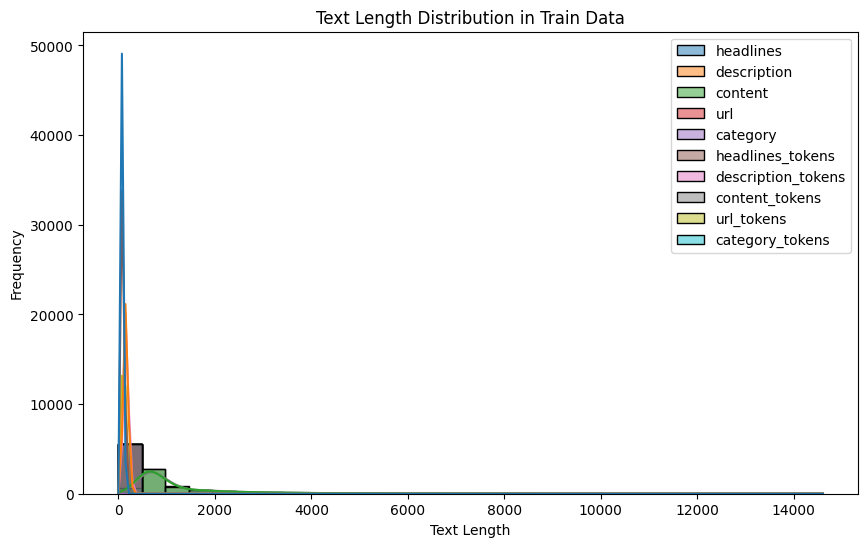

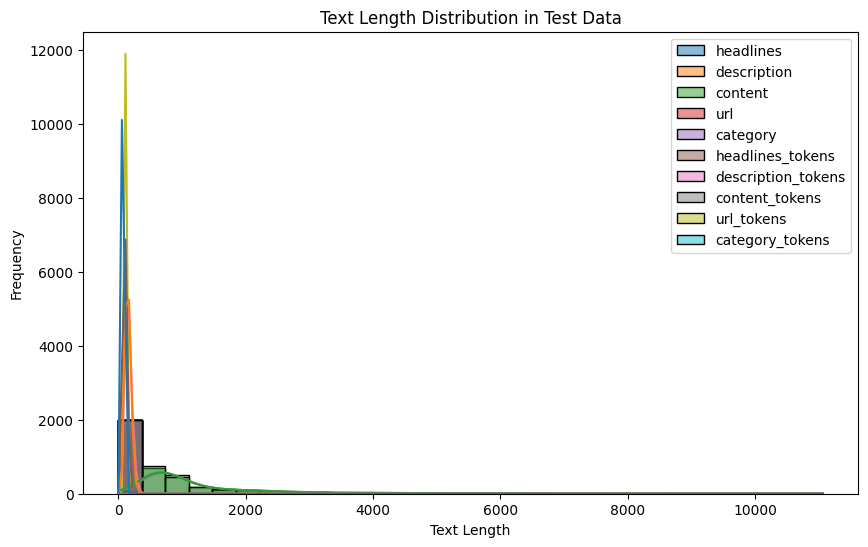

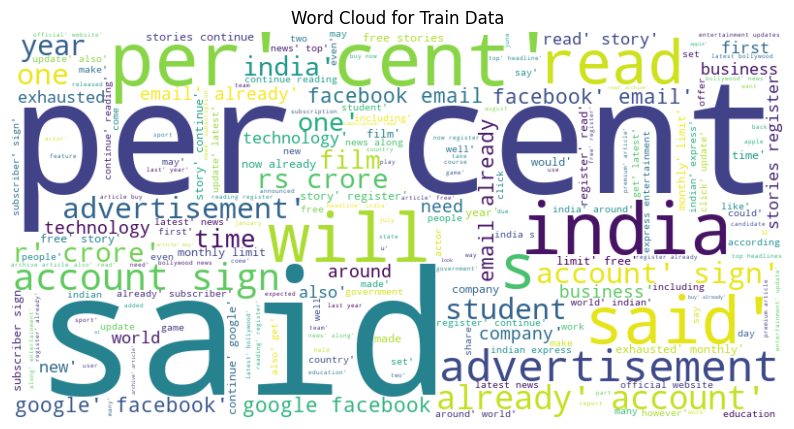

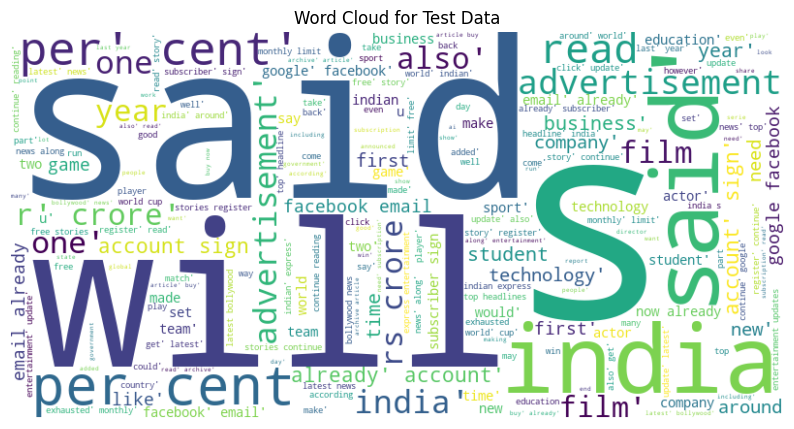

In [34]:
# Visualize the distribution of text lengths in the dataset
def plot_text_length_distribution(df, title):
    text_lengths = df.apply(lambda row: row.astype(str).str.len(), axis=1)
    plt.figure(figsize=(10, 6))
    sns.histplot(text_lengths, bins=30, kde=True)
    plt.title(title)
    plt.xlabel('Text Length')
    plt.ylabel('Frequency')
    plt.show()

plot_text_length_distribution(train_df, 'Text Length Distribution in Train Data')
plot_text_length_distribution(test_df, 'Text Length Distribution in Test Data')

# Word Cloud for each column
def plot_word_cloud(df, title):
    text = " ".join(review for review in df.astype(str).values.flatten())
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
    plt.figure(figsize=(10, 6))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(title)
    plt.show()

plot_word_cloud(train_df, 'Word Cloud for Train Data')
plot_word_cloud(test_df, 'Word Cloud for Test Data')

# Check for class imbalance if there is a target column
if 'target' in train_df.columns:
    plt.figure(figsize=(10, 6))
    sns.countplot(data=train_df, x='target')
    plt.title('Target Class Distribution in Train Data')
    plt.show()

# Distribution of top n-grams (optional, adjust as needed)
from collections import Counter
from nltk.util import ngrams
import nltk

def plot_top_ngrams(corpus, n=2, top_n=10):
    n_grams = Counter(ngrams([token for doc in corpus for token in doc], n))
    common_n_grams = n_grams.most_common(top_n)
    n_grams_df = pd.DataFrame(common_n_grams, columns=['n-gram', 'frequency'])
    
    plt.figure(figsize=(10, 6))
    sns.barplot(x='frequency', y=n_grams_df['n-gram'].apply(lambda x: ' '.join(x)), data=n_grams_df)
    plt.title(f'Top {top_n} {n}-grams')
    plt.show()


## 6. Train-test splits <a class="anchor" id="chapter6"></a>

### 6.1 Model 1: <a class="anchor" id="section_6_1"></a>

### 6.2 Model 2: <a class="anchor" id="section_6_2"></a>

### 6.3 Model 3: <a class="anchor" id="section_6_3"></a>

## 7. Model evaluation metrics <a class="anchor" id="chapter7"></a>

## 8. Model performance analysis <a class="anchor" id="chapter8"></a>

## 9. Conclusion <a class="anchor" id="chapter9"></a>

<b> Summary of Key Findings:</b>

<b> Evaluation of the Methodology:</b>

<b> Implications of the Findings:</b>

<b> Suggestions for Future Work:</b>

<b> Reflection on the Data Source and Quality:</b>

<b> Concluding Thoughts:</b>

## 10. References <a class="anchor" id="chapter10"></a>